In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
wine = pd.read_excel(r"C:\Users\Nikita\Downloads\winequalityN.xlsx")

# Univariate analysis

In [3]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
6493,red,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,NaN,11.200,6
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5
6496,red,6.000,0.310,0.470,3.600,0.067,18.000,42.000,0.995,3.390,0.660,11.000,6


In [4]:
wine.shape

(6497, 13)

In [5]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [7]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

In [8]:
missingValues(wine)

,Missing,Percentage
fixed acidity,10,0.154
pH,9,0.139
volatile acidity,8,0.123
sulphates,4,0.062
citric acid,3,0.046
residual sugar,2,0.031
chlorides,2,0.031


# Cleaning of Data

In [9]:
wine['fixed acidity'].value_counts()

6.800     354
6.600     326
6.400     305
7.000     282
6.900     279
         ... 
3.900       1
3.800       1
6.450       1
4.500       1
12.100      1
Name: fixed acidity, Length: 106, dtype: int64

In [10]:
wine['fixed acidity'].fillna(wine['fixed acidity'].median(),inplace = True)

In [11]:
wine['pH'].value_counts()

3.160    200
3.140    193
3.220    185
3.200    176
3.150    170
        ... 
2.720      1
3.850      1
3.820      1
3.810      1
3.790      1
Name: pH, Length: 108, dtype: int64

In [12]:
wine['pH'].fillna(wine['pH'].median(),inplace = True)

In [13]:
wine['volatile acidity'].value_counts()

0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: volatile acidity, Length: 187, dtype: int64

In [14]:
wine['volatile acidity'].fillna(wine['volatile acidity'].median(),inplace = True)

In [15]:
wine['sulphates'].value_counts()

0.500    275
0.460    243
0.540    234
0.440    232
0.380    214
        ... 
1.200      1
1.560      1
0.230      1
0.220      1
1.330      1
Name: sulphates, Length: 111, dtype: int64

In [16]:
wine['sulphates'].fillna(wine['sulphates'].median(),inplace = True)

In [17]:
wine['citric acid'].value_counts()

0.300    337
0.280    301
0.320    289
0.490    283
0.260    257
        ... 
1.660      1
1.230      1
0.990      1
0.880      1
0.750      1
Name: citric acid, Length: 89, dtype: int64

In [18]:
wine['citric acid'].fillna(wine['citric acid'].median(),inplace = True)

In [19]:
wine['chlorides'].value_counts()

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.610      1
0.290      1
0.360      1
0.239      1
0.230      1
Name: chlorides, Length: 214, dtype: int64

In [20]:
wine['chlorides'].fillna(wine['chlorides'].median(),inplace = True)

In [21]:
wine['residual sugar'].value_counts()

2.000     235
1.800     228
1.600     223
1.400     219
1.200     195
         ... 
12.050      1
6.950       1
9.550       1
20.150      1
3.450       1
Name: residual sugar, Length: 316, dtype: int64

In [22]:
wine['residual sugar'].fillna(wine['residual sugar'].median(),inplace = True)

In [23]:
wine['quality_check']= np.where(wine['quality']>7,1, 0)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_check
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,0
6493,red,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.510,11.200,6,0
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,0
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,0


In [24]:
wine['quality_check'].value_counts()

0    6299
1     198
Name: quality_check, dtype: int64

In [25]:
wine.drop(['quality'], axis = 1, inplace = True) 

## Outlier treatment

In [26]:
wine.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T #t = transpose 

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed acidity,6497.000,7.216,1.296,3.800,5.100,5.300,5.500,5.600,5.700,6.000,6.400,7.000,7.700,8.800,9.800,10.016,10.500,11.100,12.000,15.900
volatile acidity,6497.000,0.340,0.165,0.080,0.120,0.140,0.150,0.150,0.160,0.180,0.230,0.290,0.400,0.590,0.670,0.695,0.735,0.780,0.880,1.580
citric acid,6497.000,0.319,0.145,0.000,0.000,0.000,0.020,0.030,0.050,0.140,0.250,0.310,0.390,0.490,0.560,0.580,0.630,0.671,0.740,1.660
residual sugar,6497.000,5.444,4.758,0.600,0.900,1.000,1.100,1.100,1.200,1.300,1.800,3.000,8.100,13.000,15.000,15.600,16.400,17.354,18.200,65.800
chlorides,6497.000,0.056,0.035,0.009,0.021,0.024,0.026,0.027,0.028,0.031,0.038,0.047,0.065,0.086,0.102,0.110,0.119,0.147,0.186,0.611
free sulfur dioxide,6497.000,30.525,17.749,1.000,4.000,5.000,5.000,6.000,6.000,9.000,17.000,29.000,41.000,54.000,61.000,63.000,66.000,69.000,77.000,289.000
total sulfur dioxide,6497.000,115.745,56.522,6.000,11.000,13.000,15.000,17.000,19.000,30.000,77.000,118.000,156.000,188.000,206.000,211.000,216.000,224.000,238.000,440.000
density,6497.000,0.995,0.003,0.987,0.989,0.989,0.990,0.990,0.990,0.991,0.992,0.995,0.997,0.998,0.999,1.000,1.000,1.000,1.001,1.039
pH,6497.000,3.218,0.161,2.720,2.890,2.920,2.940,2.960,2.970,3.020,3.110,3.210,3.320,3.420,3.500,3.520,3.540,3.580,3.640,4.010
sulphates,6497.000,0.531,0.149,0.220,0.300,0.320,0.330,0.340,0.350,0.370,0.430,0.510,0.600,0.720,0.790,0.820,0.850,0.900,0.990,2.000


In [27]:
wine["fixed acidity"]=np.where(wine["fixed acidity"]>=12,12,wine["fixed acidity"])  


In [28]:
wine["fixed acidity"]=np.where(wine["fixed acidity"]<=5.100,5.100,wine["fixed acidity"])

In [29]:
wine["residual sugar"]=np.where(wine["residual sugar"]>=18.20,18.20,wine["residual sugar"])

In [30]:
wine["residual sugar"]=np.where(wine["residual sugar"]<=0.9,0.9,wine["residual sugar"])

In [31]:
wine["chlorides"]=np.where(wine["chlorides"]>=0.186,0.186,wine["chlorides"])

In [32]:
wine["free sulfur dioxide"]=np.where(wine["free sulfur dioxide"]>=77,77,wine["free sulfur dioxide"])

In [33]:
wine["free sulfur dioxide"]=np.where(wine["free sulfur dioxide"]<=4,4,wine["free sulfur dioxide"])

In [34]:
wine["total sulfur dioxide"]=np.where(wine["total sulfur dioxide"]>=238,238,wine["total sulfur dioxide"])

In [35]:
wine["total sulfur dioxide"]=np.where(wine["total sulfur dioxide"]<=11,11,wine["total sulfur dioxide"])

In [36]:
wine["pH"]=np.where(wine["pH"]>=3.640,3.640,wine["pH"])

In [37]:
wine["sulphates"]=np.where(wine["sulphates"]>=0.99,0.99,wine["sulphates"])

In [38]:
wine["alcohol"]=np.where(wine["alcohol"]>=13.400,13.400,wine["alcohol"])

In [39]:
wine.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T #t = transpose 

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
fixed acidity,6497.000,7.209,1.243,5.100,5.100,5.300,5.500,5.600,5.700,6.000,6.400,7.000,7.700,8.800,9.800,10.016,10.500,11.100,12.000,12.000
volatile acidity,6497.000,0.340,0.165,0.080,0.120,0.140,0.150,0.150,0.160,0.180,0.230,0.290,0.400,0.590,0.670,0.695,0.735,0.780,0.880,1.580
citric acid,6497.000,0.319,0.145,0.000,0.000,0.000,0.020,0.030,0.050,0.140,0.250,0.310,0.390,0.490,0.560,0.580,0.630,0.671,0.740,1.660
residual sugar,6497.000,5.418,4.638,0.900,0.900,1.000,1.100,1.100,1.200,1.300,1.800,3.000,8.100,13.000,15.000,15.600,16.400,17.354,18.200,18.200
chlorides,6497.000,0.055,0.027,0.009,0.021,0.024,0.026,0.027,0.028,0.031,0.038,0.047,0.065,0.086,0.102,0.110,0.119,0.147,0.186,0.186
free sulfur dioxide,6497.000,30.351,16.887,4.000,4.000,5.000,5.000,6.000,6.000,9.000,17.000,29.000,41.000,54.000,61.000,63.000,66.000,69.000,77.000,77.000
total sulfur dioxide,6497.000,115.560,55.901,11.000,11.000,13.000,15.000,17.000,19.000,30.000,77.000,118.000,156.000,188.000,206.000,211.000,216.000,224.000,238.000,238.000
density,6497.000,0.995,0.003,0.987,0.989,0.989,0.990,0.990,0.990,0.991,0.992,0.995,0.997,0.998,0.999,1.000,1.000,1.000,1.001,1.039
pH,6497.000,3.218,0.158,2.720,2.890,2.920,2.940,2.960,2.970,3.020,3.110,3.210,3.320,3.420,3.500,3.520,3.540,3.580,3.640,3.640
sulphates,6497.000,0.529,0.138,0.220,0.300,0.320,0.330,0.340,0.350,0.370,0.430,0.510,0.600,0.720,0.790,0.820,0.850,0.900,0.990,0.990


In [40]:

wine=pd.get_dummies(wine,columns=['type'],drop_first=True)

In [41]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_check,type_white
0,7.000,0.270,0.360,18.200,0.045,45.000,170.000,1.001,3.000,0.450,8.800,0,1
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,0,1
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,0,1
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,0,1
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,0,0
6493,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.510,11.200,0,0
6494,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,0,0
6495,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,0,0


In [43]:
cr=wine.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

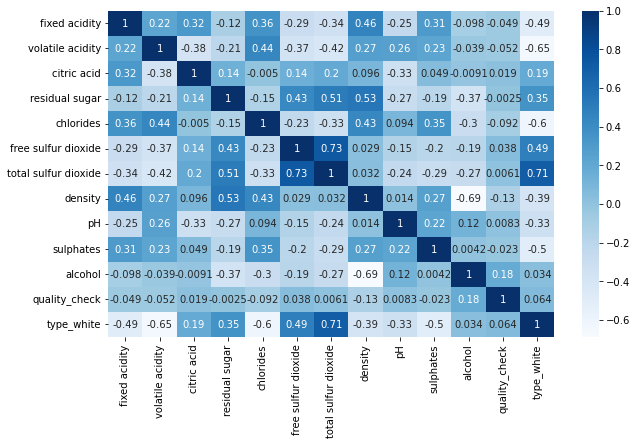

In [45]:
plt.figure(figsize= (10,6))
sns.heatmap(cr,annot=True, cmap = "Blues") 
plt.show

From above heatmap of correlation matrix we can interpret that many attributes are showing linear correlation with each other.

In [47]:
X =wine.drop('density',axis=1)  
y=wine["density"]

In [48]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc_x = StandardScaler()  
sc_x_fit=sc_x.fit(X)
X_std = sc_x_fit.transform(X)


In [49]:
X_std1=pd.DataFrame(X_std, columns=X.columns)

In [50]:
X_std1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_check,type_white
0,-0.168,-0.423,0.284,2.756,-0.366,0.868,0.974,-1.377,-0.572,-1.425,-0.177,0.571
1,-0.731,-0.241,0.147,-0.823,-0.220,-0.968,0.294,0.522,-0.283,-0.835,-0.177,0.571
2,0.717,-0.362,0.560,0.320,-0.183,-0.021,-0.332,0.269,-0.645,-0.328,-0.177,0.571
3,-0.007,-0.666,0.009,0.665,0.110,0.986,1.260,-0.174,-0.935,-0.497,-0.177,0.571
4,-0.007,-0.666,0.009,0.665,0.110,0.986,1.260,-0.174,-0.935,-0.497,-0.177,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.811,1.582,-1.644,-0.737,1.283,0.098,-1.280,1.472,0.369,0.009,-0.177,-1.750
6493,-1.053,1.279,-1.506,-0.694,0.257,0.512,-1.155,1.915,-0.138,0.600,-0.177,-1.750
6494,-0.731,1.035,-1.300,-0.672,0.770,-0.080,-1.352,1.282,1.600,0.431,-0.177,-1.750
6495,-1.053,1.856,-1.368,-0.737,0.733,0.098,-1.280,2.231,1.311,-0.244,-0.177,-1.750


In [51]:
from sklearn.decomposition import PCA

# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(X_std1)
pca_result=sklearn_pca_fit.transform(X_std1)

In [52]:
pca_result


array([[-2.59559337,  1.94693983, -1.01060314, ..., -0.22958919,
         0.32148193,  0.12682808],
       [-0.16303795, -0.56860392, -0.2295156 , ...,  1.00933584,
        -0.15506684,  0.079593  ],
       [-0.42264937,  0.42574408,  0.40204265, ..., -0.24241009,
        -0.18672581, -0.62723949],
       ...,
       [ 2.88932884, -1.08182624, -1.25766793, ..., -0.48322209,
         0.68890285,  0.116061  ],
       [ 3.08988777, -1.33608242, -2.30209496, ...,  0.02158495,
         0.89180159, -0.16137215],
       [ 1.93468529, -0.44535464,  0.35495002, ..., -0.15254772,
         1.18775941,  0.73777652]])

In [53]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.596,1.947,-1.011,-0.285,0.915,-0.886,-0.836,0.195,0.415,-0.230,0.321,0.127
1,-0.163,-0.569,-0.230,-0.466,-0.375,1.138,-0.729,-0.283,-0.236,1.009,-0.155,0.080
2,-0.423,0.426,0.402,-0.401,0.023,0.334,-0.485,0.664,-0.449,-0.242,-0.187,-0.627
3,-1.846,0.596,-0.630,-0.099,0.094,0.381,0.351,0.222,-0.218,-0.410,-0.454,0.220
4,-1.846,0.596,-0.630,-0.099,0.094,0.381,0.351,0.222,-0.218,-0.410,-0.454,0.220
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2.870,-1.144,-2.051,0.326,0.031,0.218,0.613,0.117,0.329,-0.570,0.609,0.019
6493,2.143,-1.998,-1.766,0.328,-0.215,-0.047,0.645,0.726,-0.112,-0.803,0.882,0.240
6494,2.889,-1.082,-1.258,0.815,-0.727,-0.503,0.171,-0.390,0.456,-0.483,0.689,0.116
6495,3.090,-1.336,-2.302,0.980,-0.709,-0.148,0.147,0.206,0.023,0.022,0.892,-0.161


In [56]:
pd.DataFrame(pca_result, columns=['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8', 'Pc9', 'Pc10', 'Pc11']

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_268/2597295337.py, line 1)

In [57]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(sklearn_pca_fit.explained_variance_)  # Eigen Value

,0
0,3.893
1,1.860
2,1.492
3,1.004
4,0.925
5,0.603
6,0.566
7,0.513
8,0.433
9,0.349
